In [1]:
import mcmc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#Time Calculations

def gen_hc(dim):
    mat = np.zeros((dim * 2, dim))
    for i in range(dim):
        mat[2 * i] = np.zeros(dim)
        mat[2 * i][i] = 1
        mat[2 * i + 1] = np.zeros(dim)
        mat[2 * i + 1][i] = -1
    vect = np.zeros(dim * 2)
    vect[::2] = 1
    return mat, vect

def ind_time_test(walk, dim, num_iter = 5, num_samples = 100, r = 0.4):
    avg_time = 0
    for i in range(num_iter):
        A,b = gen_hc(dim)
        start = time.time()
        res = mcmc.generate_walk(A, b, walk, r, num_samples)
        
        end = time.time()
        avg_time += (end - start)
    
    return avg_time / num_iter

def iter_time_test(df, walks = ["vaidya"], dims = [x for x in range(5, 55, 5)]):
    if df is None:
        columns = ["walk", "dim", "time"]
        df = pd.DataFrame(columns = columns)
    
    for walk in walks:
        for dim in dims:
            time = ind_time_test(walk, dim)
            df.loc[len(df)] = [walk, dim, time]
            print("Completed " + str(dim) + " " + walk)
    return df

In [6]:
A, b = gen_hc(dim = 2)
mcmc.generate_walk(A, b, 'dikin', 0.5, 10000)

array([[0.5       , 0.5       ],
       [0.53090171, 0.52153634],
       [0.53090171, 0.52153634],
       ...,
       [0.06820726, 0.10128418],
       [0.08267897, 0.13570292],
       [0.0617371 , 0.12472452]])

In [3]:
df = iter_time_test(None, walks = ["ball", "hitrun", 'dikin', 'vaidya', 'john', 'dikinls'])

Completed 5 ball
Completed 10 ball
Completed 15 ball
Completed 20 ball
Completed 25 ball
Completed 30 ball
Completed 35 ball
Completed 40 ball
Completed 45 ball
Completed 50 ball
Completed 5 hitrun
Completed 10 hitrun
Completed 15 hitrun
Completed 20 hitrun
Completed 25 hitrun
Completed 30 hitrun
Completed 35 hitrun
Completed 40 hitrun
Completed 45 hitrun
Completed 50 hitrun
Completed 5 dikin
Completed 10 dikin
Completed 15 dikin
Completed 20 dikin
Completed 25 dikin
Completed 30 dikin
Completed 35 dikin
Completed 40 dikin
Completed 45 dikin
Completed 50 dikin
Completed 5 vaidya
Completed 10 vaidya
Completed 15 vaidya
Completed 20 vaidya
Completed 25 vaidya
Completed 30 vaidya
Completed 35 vaidya
Completed 40 vaidya
Completed 45 vaidya
Completed 50 vaidya
Completed 5 john
Completed 10 john
Completed 15 john
Completed 20 john
Completed 25 john
Completed 30 john
Completed 35 john
Completed 40 john
Completed 45 john
Completed 50 john
Completed 5 dikinls
Completed 10 dikinls
Completed 15 d

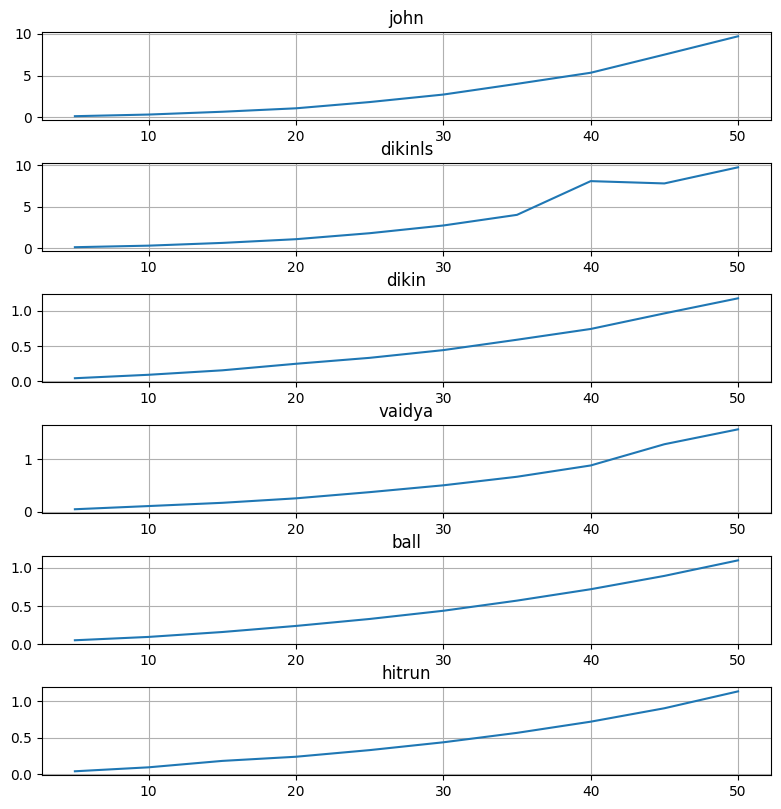

In [4]:
walk_list = ['john', 'dikinls', 'dikin', 'vaidya', 'ball', 'hitrun']
plt.rcParams["figure.figsize"] = (8, 8)
fig,ax = plt.subplots(len(walk_list))
fig.tight_layout(pad = 1.0)

ind = 0
for walk in walk_list:
    subset = df[df.walk == walk]
    ax[ind].plot(subset.dim, subset.time, label = walk)
    ax[ind].grid()
    ax[ind].set_title(walk)
    ind += 1
plt.show()

In [5]:
def mixing_time_analysis(dim, walk, num_samples, r = 0.4, thresh = 0.95):
    A, b = gen_hc(dim)
    res = mcmc.generate_walk(A, b, walk, r, num_samples)
    
    ind = -1
    for i in range(len(res)):
        if (res[i] > thresh).all():
            ind = i
            break
    return ind

def mixing_time_test(dims, walk_r, num_samples, thresh):
    columns = ['walk', 'dim', 'mix_time']
    df = pd.DataFrame(columns = columns)
    for walk in walk_r:
        for dim in dims:
            mix_time = mixing_time_analysis(dim, walk, num_samples, walk_r[walk], thresh)
            df.loc[len(df)] = [walk, dim, mix_time]
    return df

def mixing_time_test_iter(dims = [1,2,3,4,5], walk_r = {'dikin':1, 'vaidya':1, 'ball':0.3}, 
                          num_samples = 10000, thresh = 0.95, num_iter = 10):
    
    res = mixing_time_test(dims, walk_r, num_samples, thresh)
    
    res = res.rename(columns = {'mix_time':'1'})
    
    for i in range(num_iter - 1):
        res_sup = mixing_time_test(dims, walk_r, num_samples, thresh)
        res['mix'+str(i + 2)] = res_sup['mix_time']
    
    return res

In [6]:
res = mixing_time_test_iter(thresh = 0.8)

In [7]:
res['mean'] = res.iloc[:, 2:].mean(axis = 1)

In [8]:
res

,walk,dim,1,mix2,mix3,mix4,mix5,mix6,mix7,mix8,mix9,mix10,mean
0,dikin,1,150,49,27,2,11,68,21,21,89,25,46.3
1,dikin,2,411,59,183,55,25,19,47,140,416,801,215.6
2,dikin,3,1590,340,456,881,291,1237,2304,2216,1946,480,1174.1
3,dikin,4,6098,4249,4002,-1,3272,5325,1384,1370,-1,9280,3497.8
4,dikin,5,-1,-1,-1,-1,4217,3086,-1,4384,-1,-1,1168.0
5,vaidya,1,21,47,26,14,5,6,4,5,48,9,18.5
6,vaidya,2,129,188,255,152,30,619,44,222,10,701,235.0
7,vaidya,3,1978,1054,254,1295,3594,175,1009,2689,2247,1404,1569.9
8,vaidya,4,1889,225,5920,5998,6331,6174,1818,1573,1525,6289,3774.2
9,vaidya,5,6564,-1,-1,5070,-1,-1,2892,-1,-1,-1,1451.9


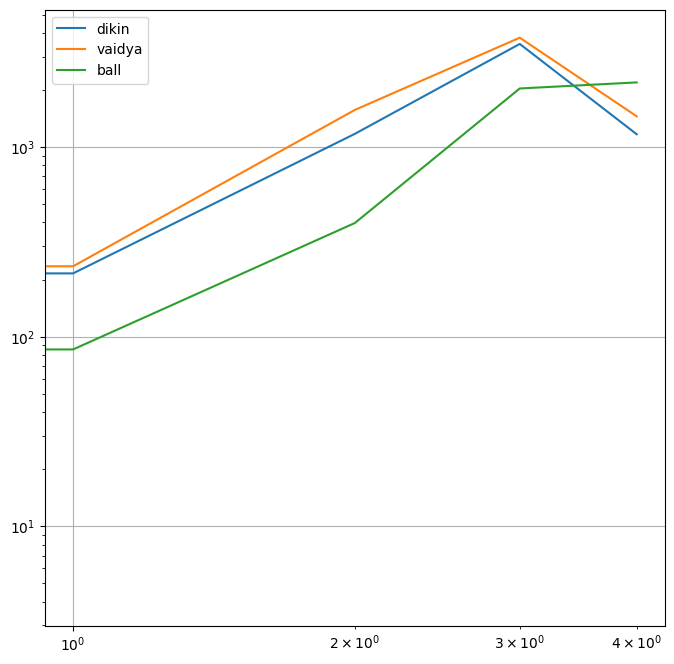

In [9]:
plt.loglog(np.arange(0, 5), res[0:5]['mean'], label = 'dikin')
plt.loglog(np.arange(0, 5), res[5:10]['mean'], label = 'vaidya')
plt.loglog(np.arange(0, 5), res[10:15]['mean'], label = 'ball')
plt.legend()
plt.grid()
plt.show()

In [10]:
def generate_square(n = 1):
    A_prop = np.array([[1, 0], [-1, 0],[0,1], [0,-1]])
    b_prop = np.array([[1], [0], [1], [0]])
    
    A = A_prop
    b = b_prop
    for i in range(n - 1):
        A = np.vstack((A, A_prop))
        b = np.vstack((b, b_prop))
    
    return A, b


def constraint_ind_test(walk, n, r = 0.4, num_samples = 10000, thresh = 0.9):
    A, b = generate_square(n)
    res = mcmc.generate_walk(A, b, walk, r, num_samples)
    ind = -1
    for i in range(len(res)):
        if (res[i] > thresh).all():
            ind = i
            break
    return ind

def constraint_ovr_test(walks = ['dikin', 'vaidya'], ns = [i for i in range(1, 11)], r = 0.4, num_samples = 10000, thresh = 0.9):
    columns = ['walk', 'n', 'hit']
    df = pd.DataFrame(columns = columns)
    for walk in walks:
        for n in ns:
            res = constraint_ind_test(walk, n, r, num_samples, thresh)
            df.loc[len(df)] = [walk, n, res]
    return df


def constraint_ovr_test_iter(walks = ['dikin', 'vaidya'], ns = [i for i in range(1, 11)], 
                             r = 0.4, num_samples = 10000, thresh = 0.9, num_iter = 10):
    
    res = constraint_ovr_test(walks, ns, r, num_samples, thresh)
    
    res = res.rename(columns = {'hit':'hit1'})
    
    for i in range(num_iter - 1):
        res_sup = constraint_ovr_test(walks, ns, r, num_samples, thresh)
        res['hit'+str(i + 2)] = res_sup['hit']
    
    return res

In [11]:
res2 = constraint_ovr_test_iter()

In [12]:
res2

,walk,n,hit1,hit2,hit3,hit4,hit5,hit6,hit7,hit8,hit9,hit10
0,dikin,1,1833,3143,669,2710,348,488,2941,2970,1433,2103
1,dikin,2,-1,-1,-1,2091,-1,3684,-1,-1,-1,9336
2,dikin,3,-1,7701,2931,2778,1138,-1,-1,1419,-1,4952
3,dikin,4,-1,6944,-1,-1,-1,-1,-1,-1,8171,-1
4,dikin,5,-1,-1,-1,-1,-1,-1,-1,-1,3964,-1
5,dikin,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,dikin,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,5709
7,dikin,8,-1,-1,8172,-1,-1,-1,-1,-1,-1,-1
8,dikin,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,dikin,10,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [13]:
def get_bucket(res):
    dim = res.shape[1]
    num_iter = 2 ** dim 
    
    total = []
    for i in range(num_iter):
        bin_str = "{0:b}".format(i)
        while len(bin_str) < 5:
            bin_str = '0' + bin_str
        
        res_copy = res.copy()
        for k in range(dim):
            
            if bin_str[k] == '0':
                res_copy = res_copy[res_copy[:, k] < 0.5]
            else :
                res_copy = res_copy[res_copy[:, k] >= 0.5]
        total.append(len(res_copy))
    total = np.array(total)
    return total/total.sum()

def mixing_test(walks = {'dikin':1, 'vaidya':1, 'ball':0.3, 'dikinls':1, 'john':1, 'hitrun':0.1},
                dims = [2,3,4,5], num_samples = 10000, num_iter = 10):
    
    res_map = {}
    for walk in walks:
        for dim in dims:
            res_map[(walk, dim)] = np.zeros((num_iter, 2 ** dim))
    
    for i in range(num_iter):
        for walk in walks:
            for dim in dims:
                A, b = gen_hc(dim)
                res = mcmc.generate_walk(A, b, walk, walks[walk], num_samples)
                total_count = get_bucket(res)
                res_map[(walk, dim)][i] = total_count
        print(i)
    return res_map

def plot_mixing_res(res_map, walks = None, dim = None):
    #data = res_map[(walk, dim)]
    plt.rcParams["figure.figsize"] = (10, 10)
    
    if walks is not None:
        
        data = {}
        for key in res_map:
            if key[0] == walks:
                data[(walks, key[1])] = res_map[key]
        
        fig, ax = plt.subplots(len(data))
        fig.tight_layout()
        ind = 0
        for key in data:
            w, d = key
            ax[ind].bar(np.arange(2 ** d), np.mean(data[key], axis = 0))
            ax[ind].set_title(w + ' ' + str(d))
            ind += 1
    
    elif dim is not None:
        data = {}
        for key in res_map:
            if key[1] == dim:
                data[(key[0], key[1])] = res_map[key]
        
        fig, ax = plt.subplots(len(data))
        fig.tight_layout()
        ind = 0
        for key in data:
            w, d = key
            ax[ind].bar(np.arange(2 ** d), np.mean(data[key], axis = 0))
            ax[ind].set_title(w + ' ' + str(d))
            ind += 1
        

In [15]:
res_map = mixing_test()

0
1
2
3
4
5
6
7
8
9


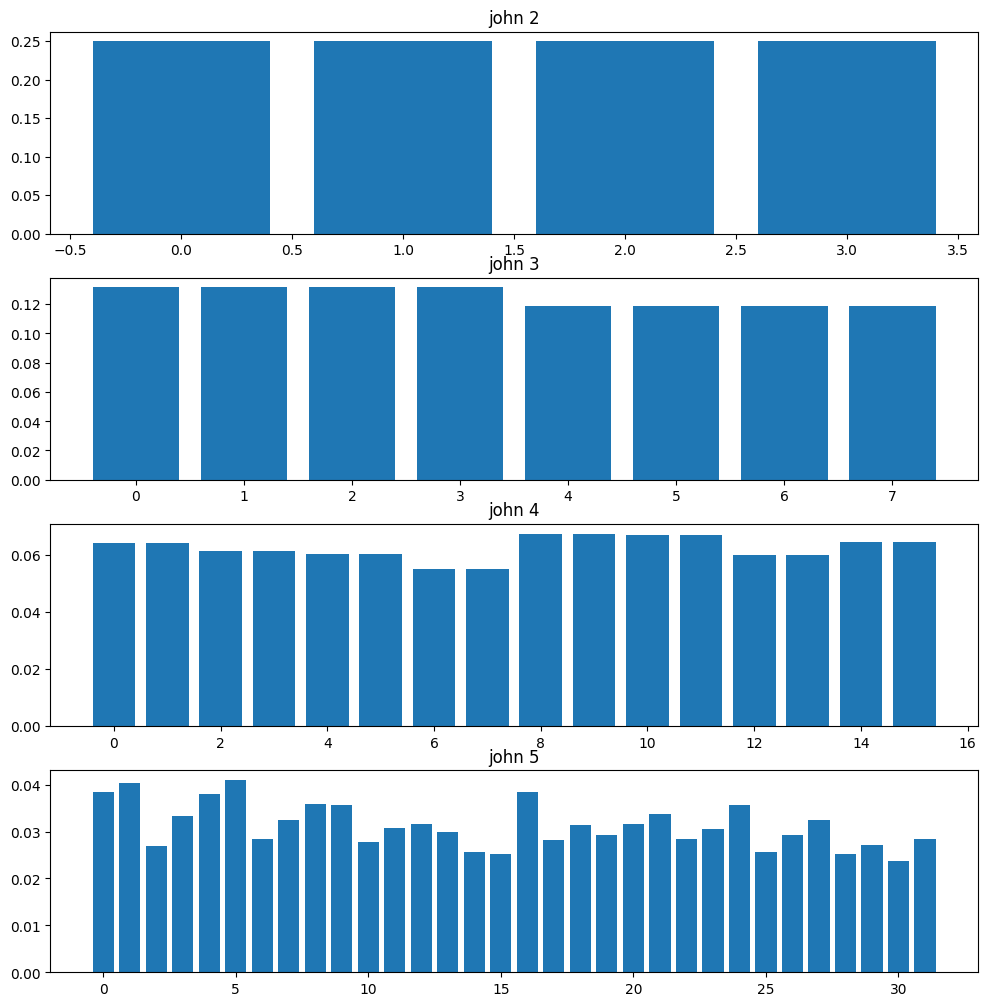

In [23]:
plot_mixing_res(res_map,  walks = "john")

In [27]:
A, b = gen_hc(2)

mcmc.generate_walk(A, b, "ball", 0.4, 10000)

array([[0.1167841 , 0.61465417],
       [0.1167841 , 0.61465417],
       [0.46362627, 0.41540429],
       ...,
       [0.88967403, 0.38876037],
       [0.88967403, 0.38876037],
       [0.88967403, 0.38876037]])